<a href="https://colab.research.google.com/github/suhyeon03/DeepLearning/blob/main/ch6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 학습 관련 기술

# 매개변수 갱신

* 신경망 학습의 목적은 손실 함수의 값을 가능한 낮추는 매개변수를 찾는 것이다.
* 이러한 문제를 푸는 것을 최적화라고 한다.
* 그러나 매개변수 공간은 매우 넓고 복잡해서 최적의 솔루션은 쉽게 찾지못한다.
* 지금까지는 매개변수의 기울기를 이용했다.
  * 매개변수의 기울기를 구해, 기울어진 방향으로 매개변수 값을 갱신하는 일을 몇 번이고 반복해서 최적의 값에 다가갔다. 이것이 확률적 경사 하강법이란 방법이다.
  

In [1]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

* 초기화 때 받는 인수인 lr은 learning rate(학습률)을 뜻한다.
* updata 매서드는 SGD 과정에서 반복해서 불린다.

In [ ]:
from os import X_OK
# 의사코드
network = TwoLayerNet(...)
optimizer = SGD()
for i in range(10000):
    ...
    x_batch, t_batch = get_mini_batch(...) # 미니배치
    grads = network.gradient(x_batch, t_batch)
    params = network.params
    optimizer.update(params, grads)
    ...

NameError: name 'TwoLayerNet' is not defined

* optimizer는 '최적화를 행하는자'이다. 매개변수 갱신은 optimizer가 책임지고 수행하니, 우리는 optimizer에 매개변수와 기울기 정보만 넘겨주면 된다.
* 이처럼 최적화를 담당하는 클래스를 분리해 구현하면서 기능을 모듈화하기 좋다.
* 추후에 소개될 모멘텀이라는 기법역시 updatㄷ라는 공통의 메서드를 갖도록 구현한다.

SGD 단점

* SGD는 매개변수의 기울기를 구해 기울어진 방향으로 매개변수 값을 갱신하는 일을 몇 번이고 반복해서 최적의 값에 다가갔다.
* SGD는 단순하고 구현도 쉽지만 비효율적일 때가 있다.

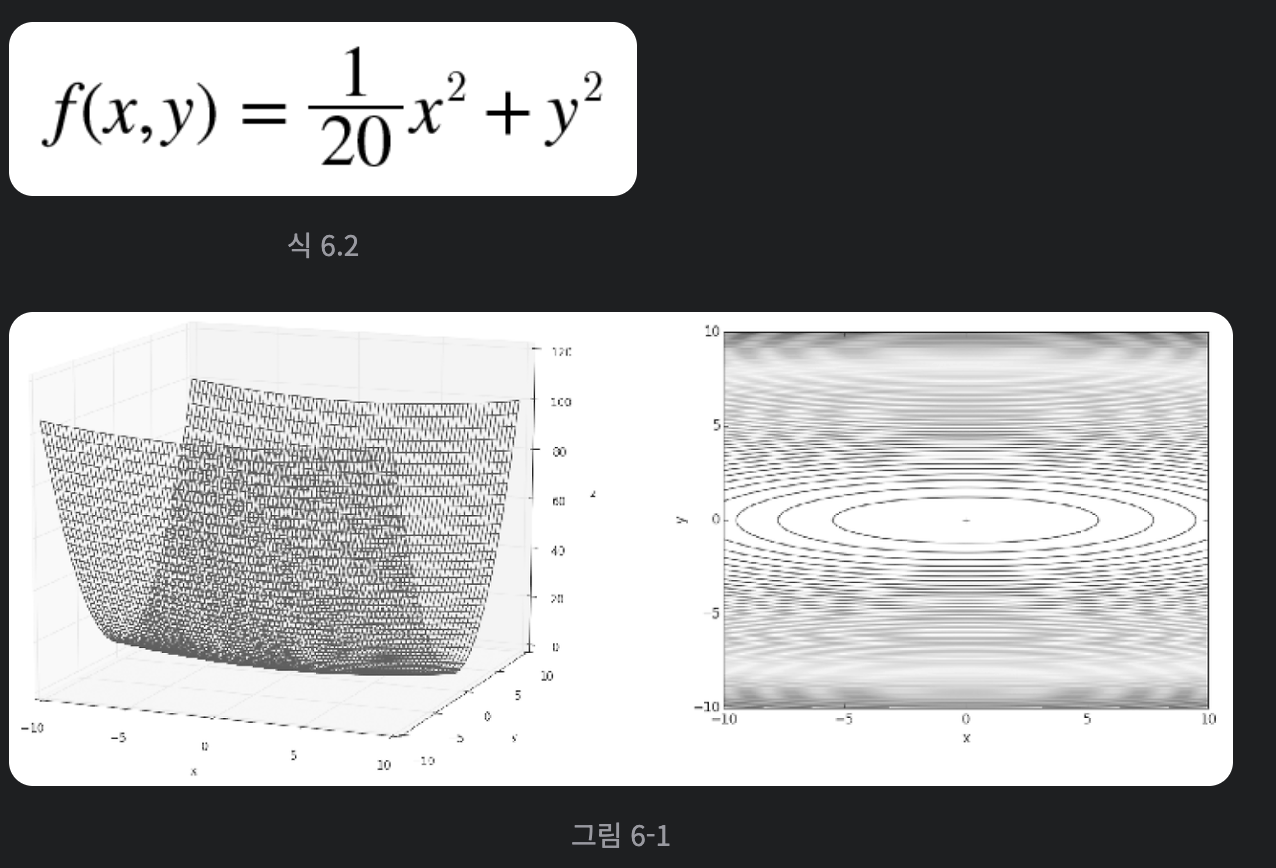

* 식 6.2는 그림 6-1의 왼쪽처럼 밥그릇을 x축 방향으로 늘인 모습이며 실제로 등고선은 오른쪽과 같이 x축 방향으로 늘인 타원으로 되어 있다.
* 식 6.2의 기울기를 그려보면 그림 6-2처럼 된다.

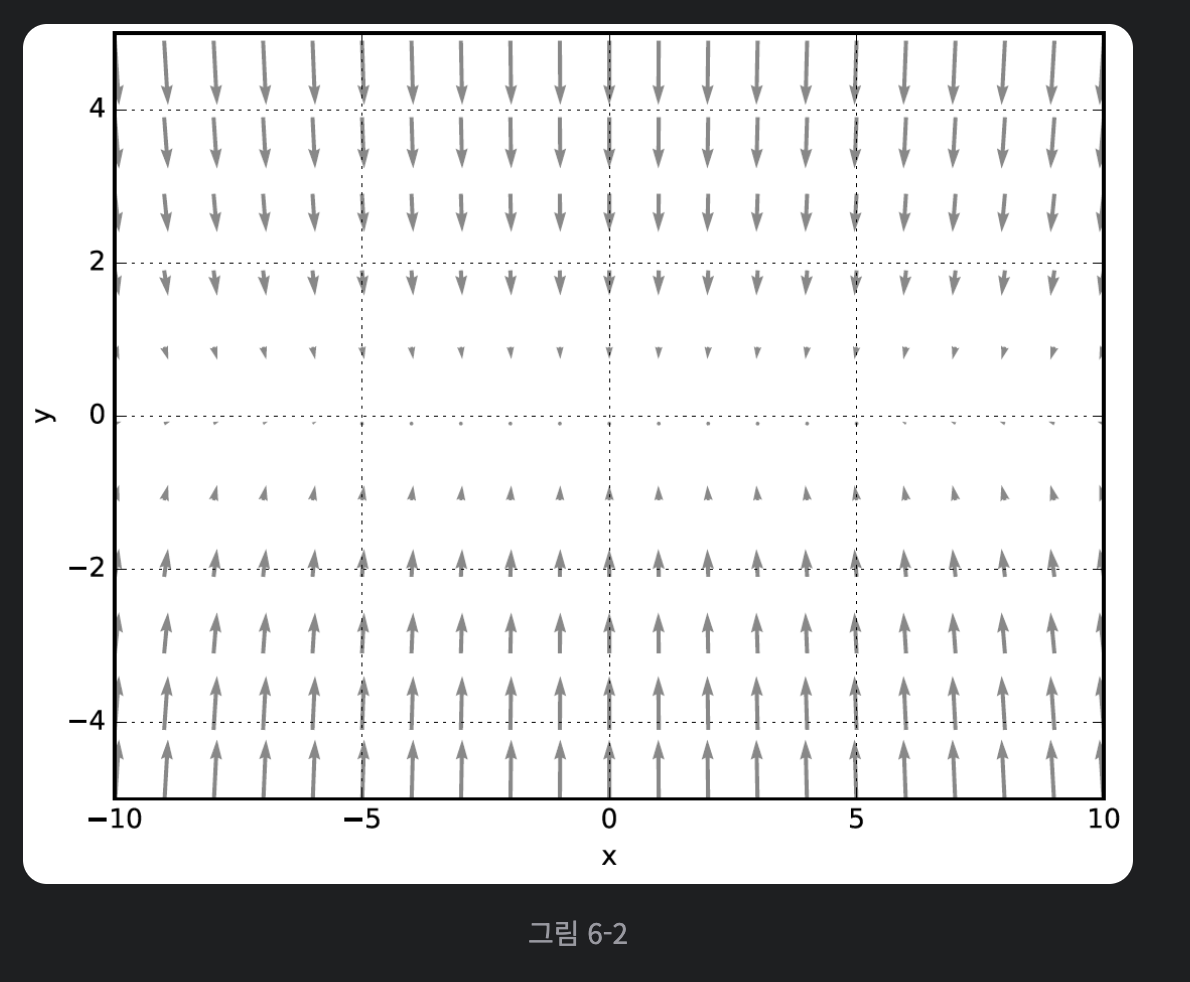

* 이 기울기는 y축 방향은 크고 x축 방향은 작다는 것이 특징이다.
* y방향은 가파른데 x방향은 완만하다.
* 주의할 점은 최솟값이 되는 지점은 (0,0)이지만 보여지는 기율기 대부분은 (0,0)을 가리키지 않는 점이다.

* 이 함수에 SGD를 적용해본다. 탐색을 시작하는 초기값을 -7, 2로 한다.

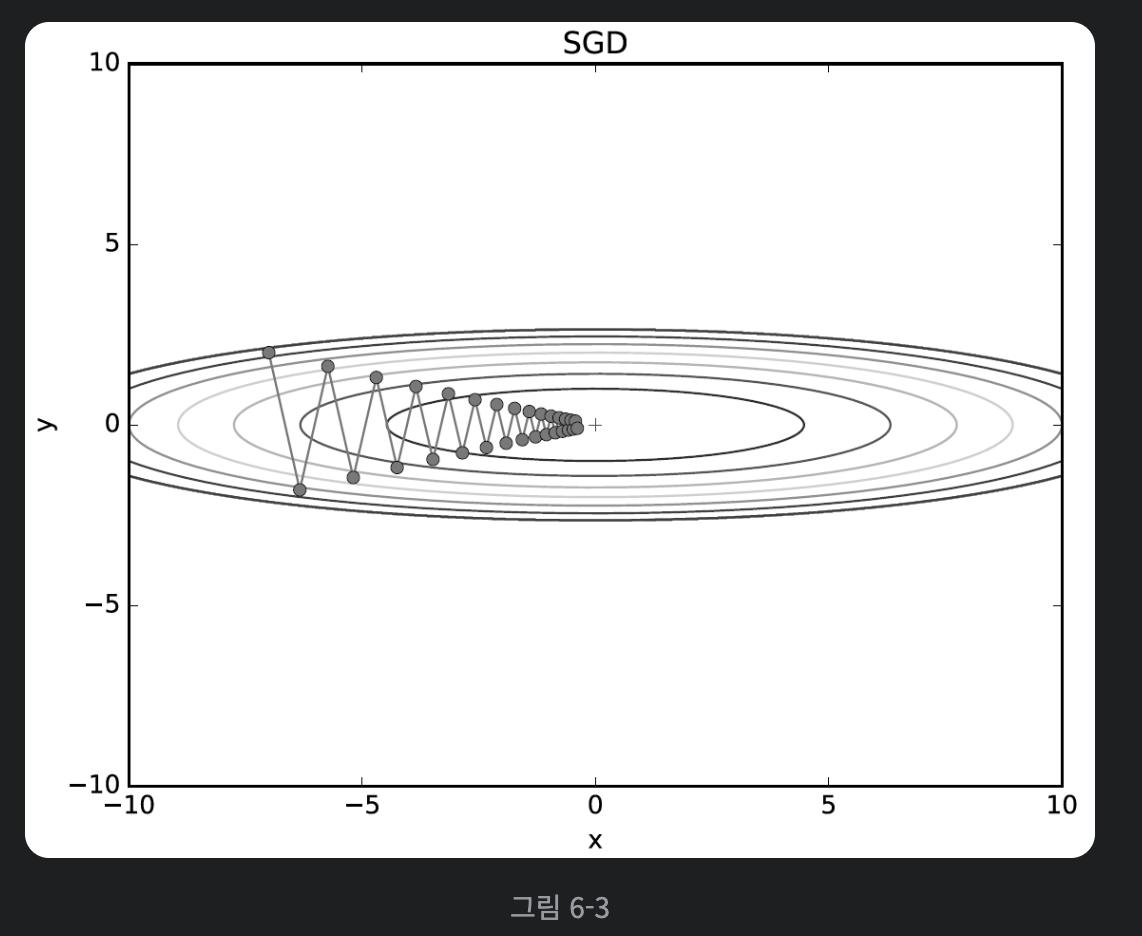

* SGD는 그림 6-3과 같은 심하게 굽이진 움직임을 보여주는데 이는 비효율적인 움직임이다.

* SGD의 단점은 비등방성 함수(방향에 따라 성질, 즉 기울기가 달라지는 함수)에서는 탐색 경로가 비효율적이라는 것이다.

* SGD의 이런 단점을 개선 해 주는 방법으로는 모멘텀, AdaGrad, Adam이 있다.

모멘텀

* 모멘텀은 '운동량'을 뜻하는 단어이고 물리와 관계가 있다.

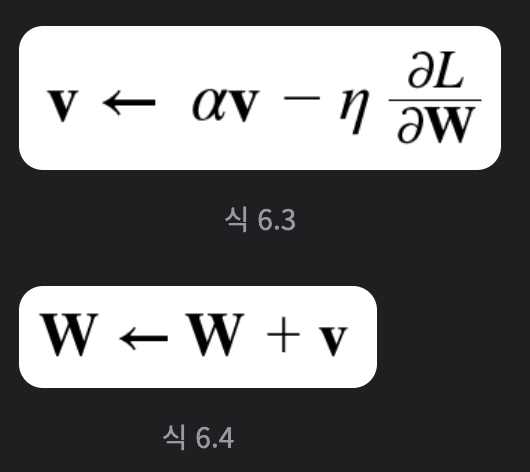

* W는 갱신할 가중치 매개변수, ∂L/∂W는 W에 대한 손실함수의 기울기, n는 학습률이다.
* v라는 새로운 변수가 나오는데 이는 물리에서 말하는 속도에 해당한다.
* 식 6.3은 기울기 방향으로 힘을 받아 물체가 가속된다는 물리법칙을 나타낸다.
* 식 6.3의 αv항은 물체가 아무런 힘을 받지 않을 때 서서히 하강시키는 역할을 한다.
  * 물리에서 지면 마찰이나 공기 저항에 해당한다.

In [2]:
class Momentum:

    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None

    def update(self, params, grads):
        if self.v is None:
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)

        for key in params.keys():
            self.v[key] = self.momentum*self.v[key] - self.lr*grads[key]
            params[key] += self.v[key]

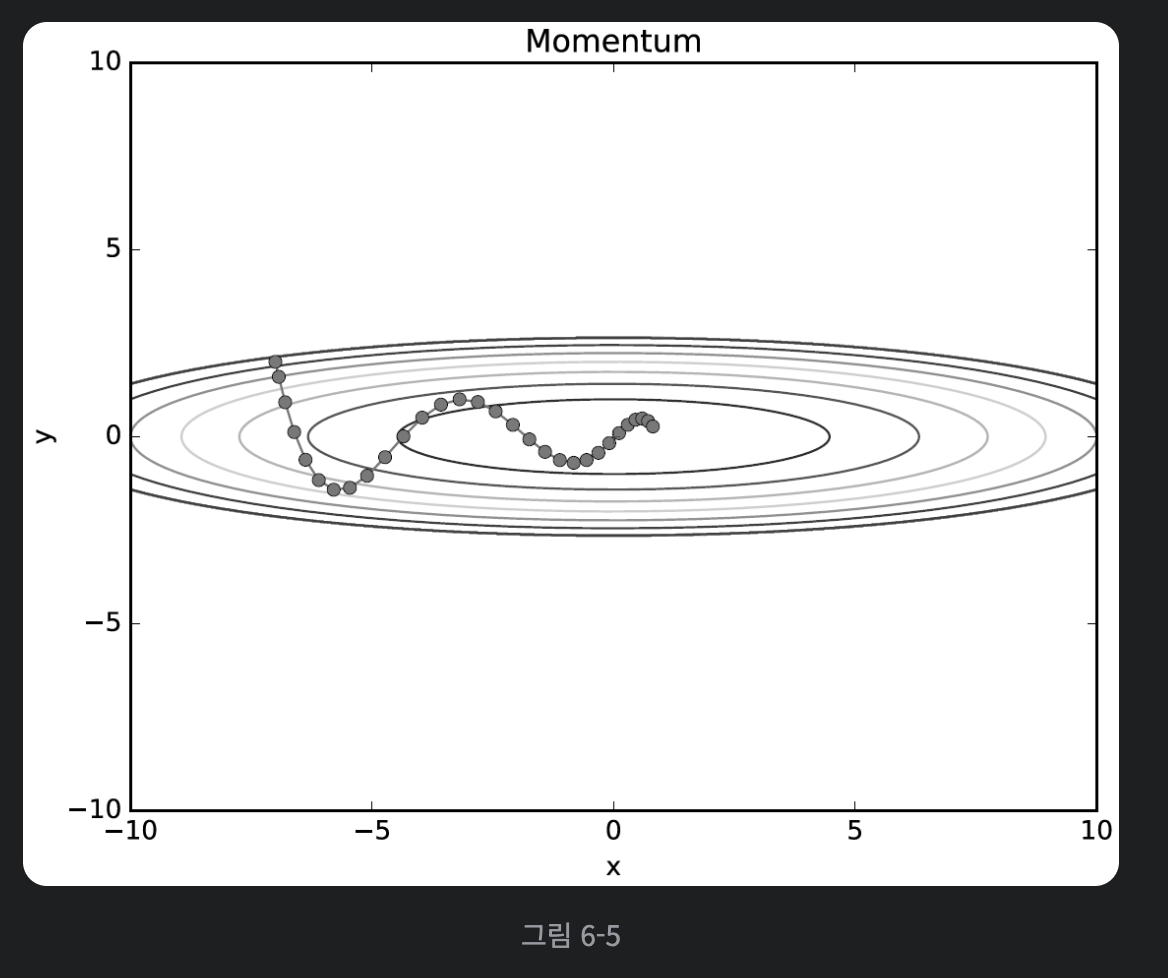

* 그림에서 보듯 모멘텀의 갱신 경로는 공의 그릇 바닥을 구르듯 움직인다.
* SGD와 비교하면 지그재그 정도가 덜한 것을 알 수 있다.
* 이는 x축의 힘은 아주 작지만 방향은 변하지 않아서 한 방향으로 일정하게 가속하기 때문이다.
* 거꾸로 y축의 힘은 크지만 위아래로 번갈아 받아서 상충하여 y축 방향의 속도는 안정적이지 않다.
* 전체적으로는 SGD보다 x축 방향으로 빠르게 다가가 지그재그 움직임이 줄어든다.

AdaGrad

* 신경망 학습에서는 학습률 값이 중요하다. 이 값이 너무 작으면 학습 시간이 너무 길어지고 반대로 너무 크면 발산하여 학습이 제대로 이뤄지지 않는다.


* 이 학습률을 정하는 효과적 기술로 학습을 진행하면서 학습률을 점차 줄여가는 방법인, 학습률 감소가 있다.

* 학습률을 서서히 낮추는 가장 간단한 방법은 매개변수 전체의 학습률 값을 일괄적으로 낮추는 것이다. 이를 발전 시킨것이 AdaGrad이다. AdaGrad는 각각의 매개변수에 맞춤형 값을 만들어 준다.

* AdaGrad는 개별 매개변수에 적응적으로 학습률을 조정하면서 학습을 진행한다.  AdaGrad의 갱신 방법은 수식으로는 다음과 같다.

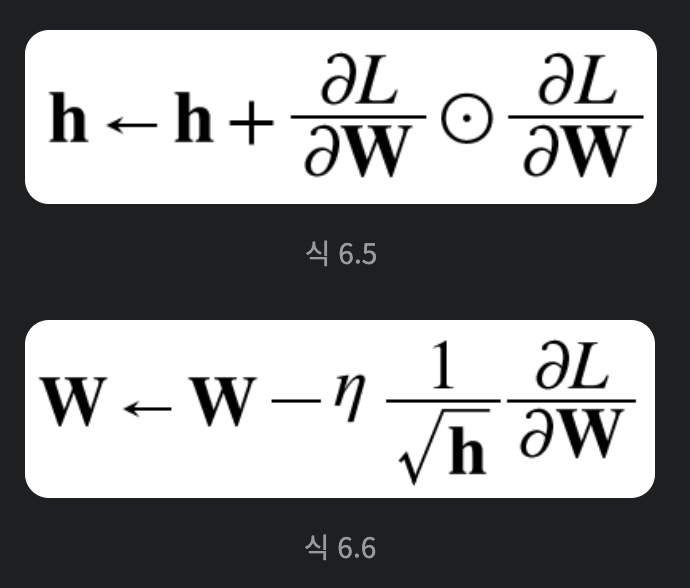

* 여기서는 새로운 변수 h가 등장한다.
* h는 기존 기울기 값을 제곱하여 계속 더해준다. (*)기호는 행렬의 원소별 곱셉을 의미
* 그리고 매개변수를 갱신할 때 1/루트h를 곱해 학습률을 조정한다.
* 매개변수의 원소 중에서 많이 움직인(크게 갱신된) 원소는 학습률이 낮아진다는 뜻인데 다시 말해 학습률 감소가 매개변수의 원소마다 다르게 적용됨을 뜻한다.

  * adagrad는 과거의 기울기를 제곱하여 계속더해간다. 그래서 학습이 진행할수록 갱신 강도가 약해진다. 실제로는 무한이 학습하면 갱신량이 0이되어 전혀 갱신되지 않는다.
  * RMSProp는 과거의 모든 기울기를 균등하게 더해가는 것이 아니라, 먼 과거의 기울기는 서서히 잊고 새로운 기울기 정보를 크게 반영한다. -> 지수이동평균

In [3]:
class AdaGrad:

    """AdaGrad"""

    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None

    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)

        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

* 마지막 줄에서 1e-7이라는 작은 값은 self.h[key]에 0이 담겨 있어도 0으로 나누는 사태를 막아준다.

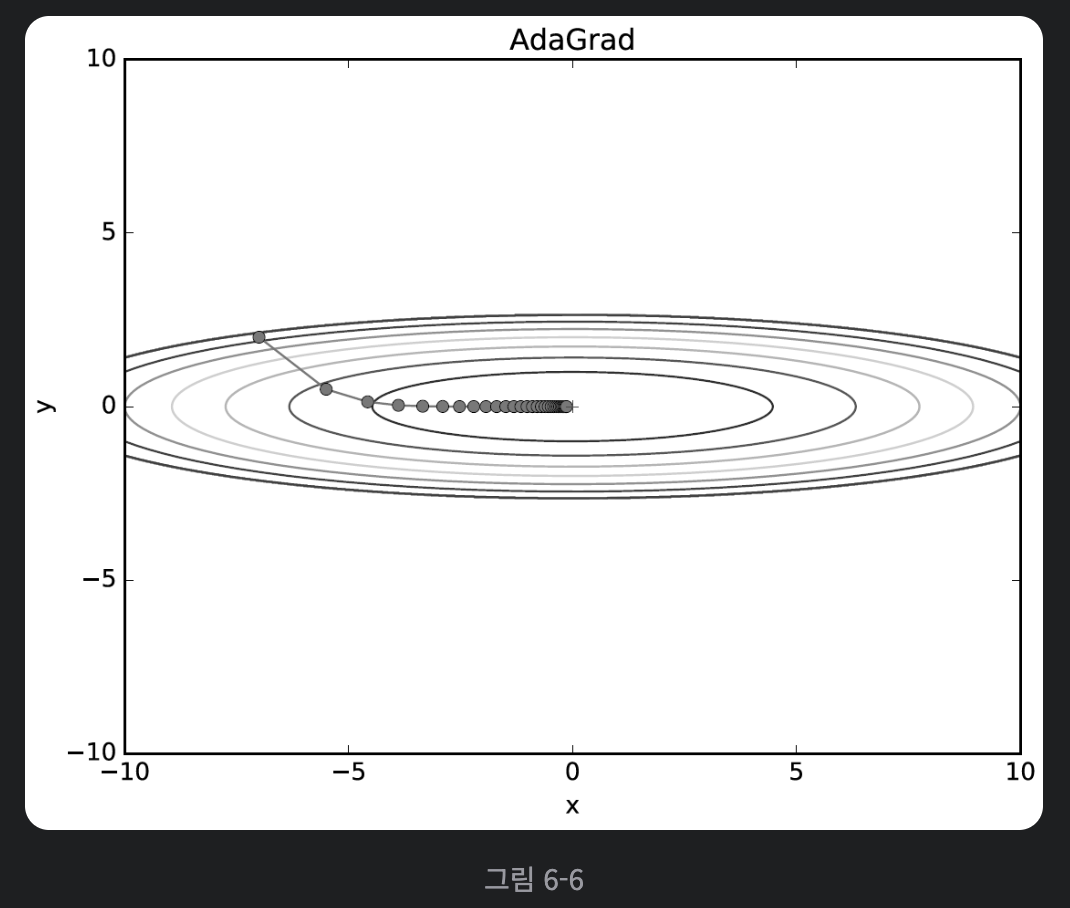

* 그림 6-6을 보면 최곳값을 향해 효율적으로 움직이는 것을 알 수 있다.
* y축 방향은 기울기가 커서 처음에는 크게 움직이지만 그 큰 움직임에 비례해 갱신 정도도 큰 폭으로 작아지도록 조정된다.
* 그래서 y축 방향으로 갱신 강도가 빠르게 약해지고 지그재그 움직임이 줄어든다.

Adam

* 모멘텀은 공이 그릇 바닥을 구르는 듯한 움직임을 보여줬다.
* adagrad는 매개변수의 원솜마다 적응적으로 갱신 정도를 조정했다.
* 이둘의 기법을 융화했다고 볼 수 있다.
* Adam은 하이퍼파라미터의 편향 보정이 진행된다.

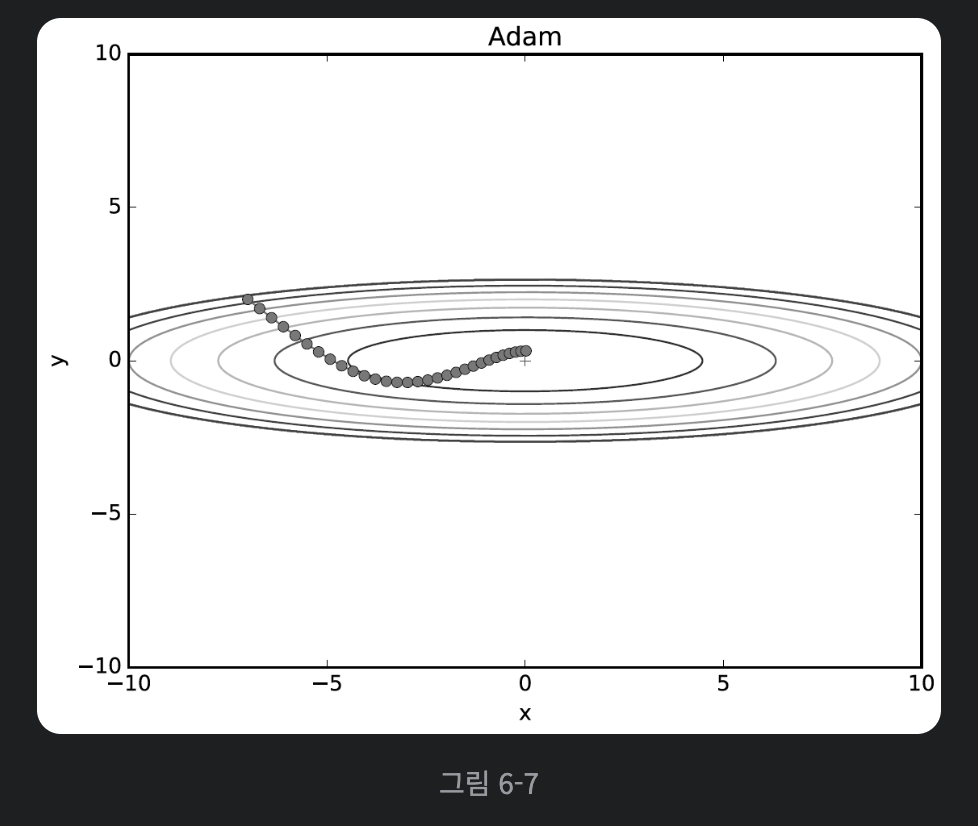

그림 6-7과 같이 Adam 갱신 과정도 그릇 바닥을 구르듯 움직인다. 모멘텀과 비슷한 패턴인데 모멘텀 때보다 공의 좌우 흔들림이 적다. 이는 학습의 갱신 강도를 적응적으로 조정해서 얻는 혜택이다.

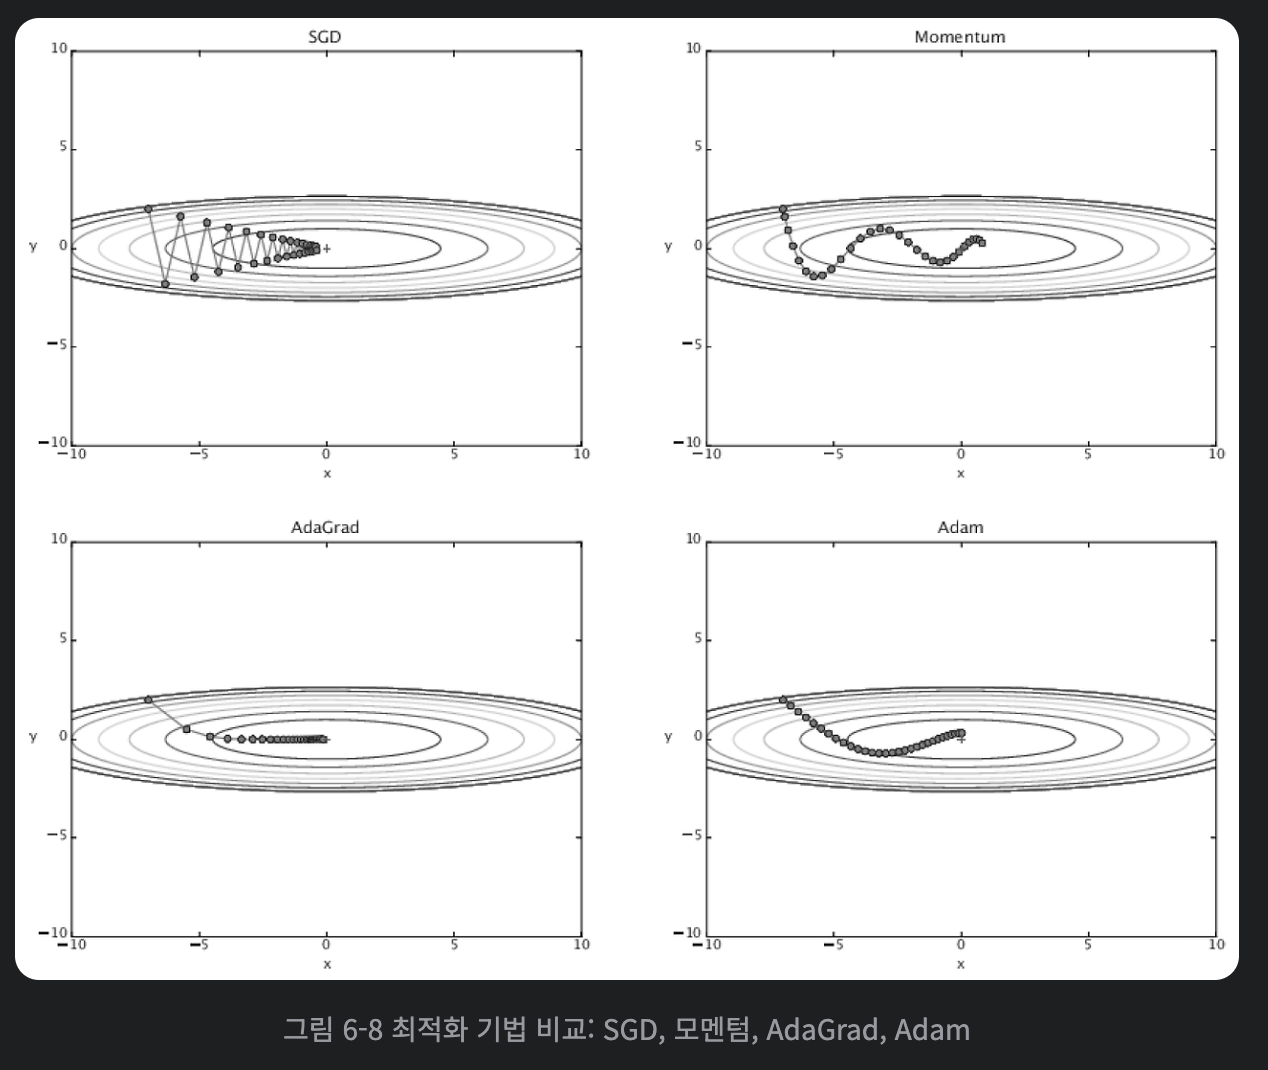

* 그림 6-8과 같이 사용한 기법에 따라 갱신 경로가 다르다.
* 풀어야 할 문제가 무엇이냐에 따라 달라지므로 주의해야 하며 하이퍼파라미터를 어떻게 설정하느냐에 따라서도 결과가 바뀐다.
* 많은 연구에서는 SGD를 사용하고 있고 요즘엔 Adam에 만족하며 많이 쓰고있다.

Minist 데이터셋으로 본 갱신 방법 비교

In [4]:
!git clone https://github.com/WegraLee/deep-learning-from-scratch.git
import sys
sys.path.append('/content/deep-learning-from-scratch')
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *
from dataset.mnist import load_mnist

Cloning into 'deep-learning-from-scratch'...
remote: Enumerating objects: 1118, done.
remote: Counting objects: 100% (175/175), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 1118 (delta 142), reused 129 (delta 129), pack-reused 943 (from 2)
Receiving objects: 100% (1118/1118), 52.68 MiB | 24.51 MiB/s, done.
Resolving deltas: 100% (645/645), done.


Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
===========iteration:0===========
SGD:2.3772428822200515
Momentum:2.3045090470508462
AdaGrad:2.2201090284167995
Adam:2.222434733571626
===========iteration:100===========
SGD:1.5444495696907337
Momentum:0.5023830016482949
AdaGrad:0.3021956011382839
Adam:0.47038071205726395
===========iteration:200===========
SGD:0.6263342356864374
Momentum:0.1445557067638996
AdaGrad:0.03719867734794072
Adam:0.06423822148742331
===========iteration:300===========
SGD:0.5036322547577596
Momentum:0.15405772439238086
AdaGrad:0.05451001511535886
Adam:0.1468846113818672
===========iteration:400===========
SGD:0.43347155109544544
Momentum:0.1451061691158638
AdaGrad:0.06477740777518748
Adam:0.08391499367881353
===========iteration:500====

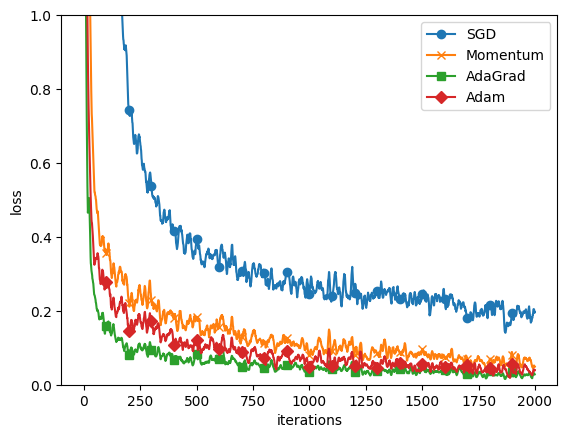

In [5]:
# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

* SGD의 학습진도가 가장 느렸다.
* 이 실험에서 주의할 점은 하이퍼 파라미터인 학습률과 신경망 구조에 따라 결과가 달라진다는 것이다
* 일반적으로는 SGD보다 다른 세 기법이 빠르게 학습하고, 때로는 최종 정확도도 높게 나타난다.

# 가중치의 초기값

* 신경망 학습에서 특히 중요한 것은 가중치의 초기값이다.
* 가중치 초기값을 무엇으로 설정하느냐가 신경망 학습의 성패가 가르는 일이 실제로 자주 있다.
* 오버피팅을 억제해 범용성능을 높이히는 테크닉인 가중치 감소에 대해 소개한다.
* 가중치 감소는 간단하게 가중치 매개변수의 값이 작아지도록 학습하는 방법이다.
* 일단 정공법은 가장 작은 값에서 시작해보자

초깃값을 0으로 했을 때

* 가중치의 초깃값을 모두 0으로 설정하면 학습이 올바로 이뤄지지 않는다.
* 오차역전법에서 모든 가중치의 값이 똑같이 갱신되기때문이다.
* 예를 들어 2층 신경망에서 첫 번쨰와 두 번째 층의 가중치가 0이라고 가정하면
* 순전파 떄는 입력층의 가중치가 0이기 떄문에 두번째 층의 뉴런에 모두 같은 값이 전달된다.
* 두번째 층의 모든 뉴런에 같은 값이 입력된다는 것은 역전파 때 두 번째 층의 가중치가 모두 똑같이 갱신된다는 말이 된다.
* 그럼 뉴런 1개만 쓰는것과같은 효과?이고 이는 가중치를 여러개 갖는 의미를 사라지게 한다.
* 이렇게 가중치가 고르게되는 현상을 막으려면 초깃값을 무작위로 설정해야한다.

은닉층의 활성화값 분포

* 은닉층의 활성화값 (활성화 함수의 출력 데이터)의 분포를 관찰하면 중요한 정보를 얻을 수 있다.
* 가중치의 초기값에 따라 은닉층 활성화 값들이 어떻게 변화하는지 간단한 실험을 한다.

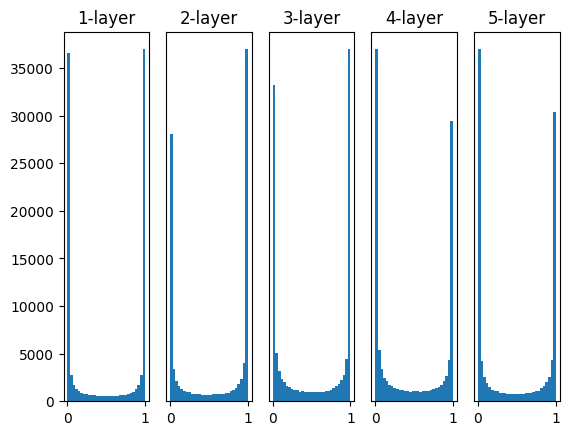

In [6]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)

input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

* 이 코드에서는 가중치의 분포에 주의해야한다.
* 이번에는 표준편차가 1인 정규분포를 이용했는데, 이 분포된 정도를 바꿔가며 활성화 값들의 분포가 어떻게 변화하는지 관찰하는 것이 이 실험의 목적이다.

* 그래프를 보면 0과 1에 치우쳐있다.
* 그래서 데이터가 0과 1에 치우쳐 분포하게 되면 역전파의 기울기 값이 점점 작아지다가 사라진다.
* 이것이 기울기 소실로 알려진 문제이다.
* 층을 깊게 하는 딥러닝에서는 기울기 소실은 더 심각한 문제가 될 수 있다.

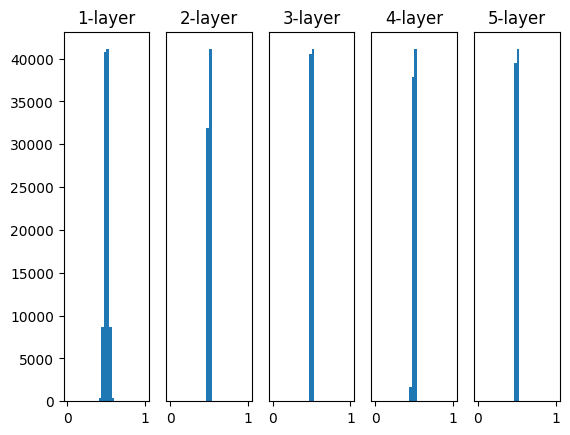

In [7]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)

input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    # w = np.random.randn(node_num, node_num) * 1
    w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

* 이번에는 0.5 부근에 집중되었다.
* 앞의 예처럼 0과 1로 치우치진 않았으니 기울기 소실문제는 일어나지않는다.
* 활성화 값들이 치우쳤다는 것은 표현력 관점에서는 큰 문제가 있다.
* 이상황에서는 다수의 뉴런이 거의 같은 값을 출력하고 있으니 뉴런을 여러개 둔 의미가 없다는 의미이다.

* 즉 적당히 고르게 활성화값들이 분포해야한다.

사비에르 글로로트와 요슈아 벤지오의 논문에서 권장하는 가중치 초깃값인, 일명 Xavier 초깃값을 써본다.

* 일반적인 딥러닝 프레임워크들이 표준적으로 이용하고 있다.
* 앞 계층의 노드가 n개라면 표준편차가 1/루트n인 분포를 사용하면 된다는 결론을 이끌었다.

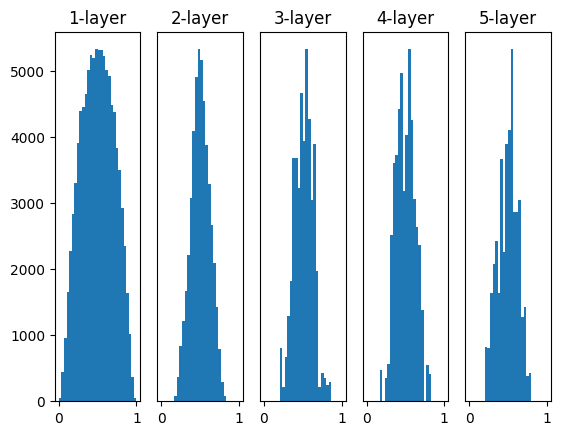

In [8]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)

input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값을 다양하게 바꿔가며 실험해보자！
    # w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 활성화 함수도 바꿔가며 실험해보자！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

* 오른쪽으로 갈수록 약간씩 일그러지고 있다.
* 시그모이드 대신 tanh함수를 이용하면 개선된다.
* 두 함수 모드 s자 모향 곡선함수이지만 시그모이드는 0,0.5에서 대칭이다.
* 활성함수용으로는 원점에서 대칭인 함수가 바람직하다고 알려져있다.

ReLU를 사용할 때의 가중치 초깃값

* Xavier 초깃값은 활성화 함수가 선형인 것을 전제로 이끈 결과이다. sigmoid 함수와 tanh 함수는 좌우 대칭이라 중앙 부근이 선형인 함수로 볼 수 있다.
* 반면 ReLU를 이용할 때는 ReLU에 특화된 초깃값을 이용해야 한다.
* 카이밍 히의 이름따 He초기값이라고 한다.

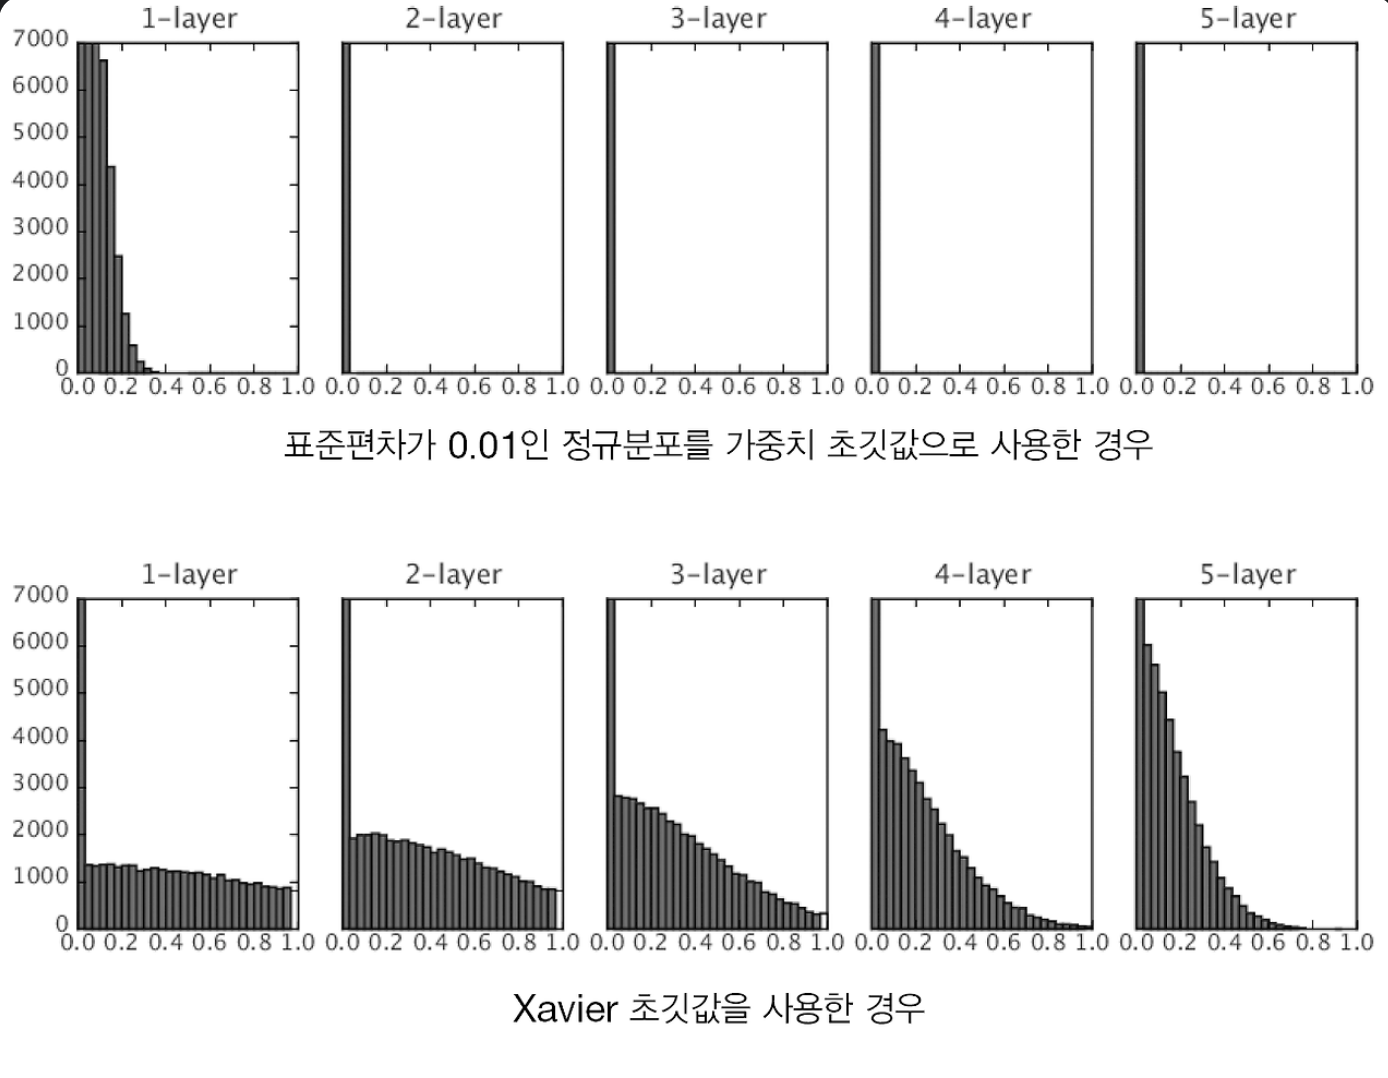

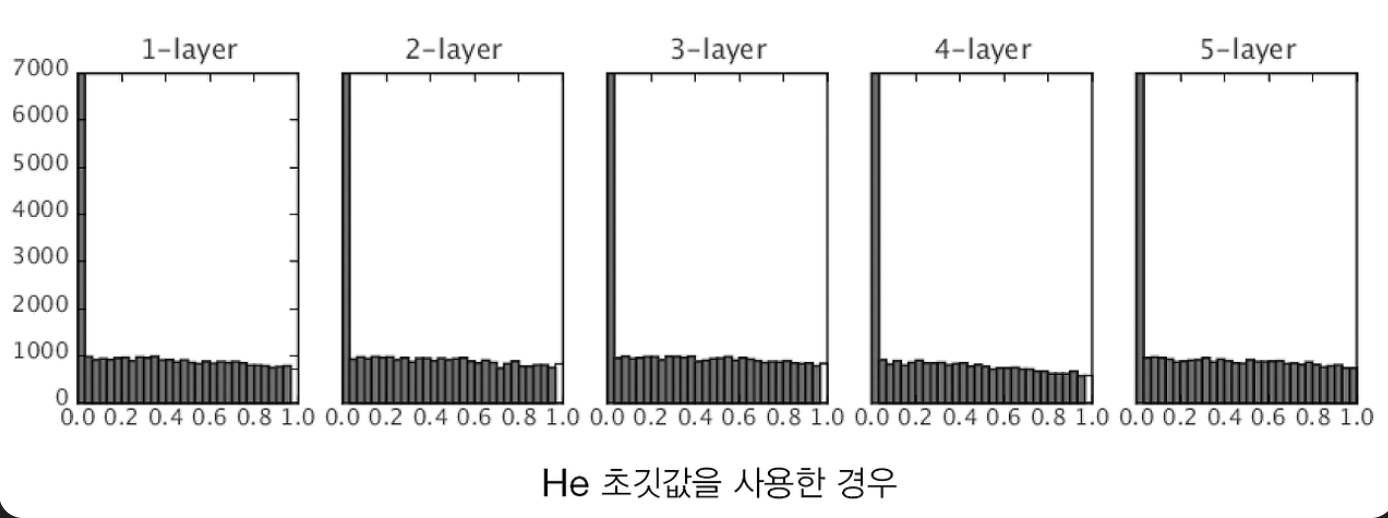

* std = 0.01일 때는 각층의 활성화함수들이 아주 작은 값이다.
  * 신경망에 아주 작은 데이터가 흐른다는 것은 역전파 때 가중치의 기울기 역시 작아진다는 뜻이다.
  * 이는 중대한 문제이고, 실제로도 학습이 거의 이루어지지 않을 것이다.

* Xavier 초깃값 결과를 보면 층이 깊어질수록 치우침이 조금씩 커진다.
  * 기울기 소실의 문제가 발생한다.

* He 초깃값은 모든 층에서 고르게 분포되어있다.
  * 층이 깊어져도 분포가 균일하게 유지되기 떄문에 역전파 때도 적절한 값이 나올 것으로 기대된다.

* 결론
1. 활성함수로 ReLU를 사용할 때는 He 초깃값을 사용한다.
2. sigmoid나 tanh등 s자 모양 곡선 일때는 Xavier 초깃값을 사용한다.

Mnist 데이터셋으로 본 가중치 초깃값 비교

===========iteration:0===========
std=0.01:2.302521389662365
Xavier:2.3167130806730984
He:2.467169857496855
===========iteration:100===========
std=0.01:2.3019178928684507
Xavier:2.265729588723704
He:1.2852378366530668
===========iteration:200===========
std=0.01:2.3018975183703905
Xavier:2.197497911547024
He:0.6668990804971804
===========iteration:300===========
std=0.01:2.3012630740243845
Xavier:1.9844142976026706
He:0.48522680592453027
===========iteration:400===========
std=0.01:2.303284489641893
Xavier:1.5505711934543571
He:0.49606230596328493
===========iteration:500===========
std=0.01:2.303243417648269
Xavier:1.2086242982784166
He:0.4840188214324746
===========iteration:600===========
std=0.01:2.3044178398757635
Xavier:0.8650508496431111
He:0.4941435038141708
===========iteration:700===========
std=0.01:2.2998924554228073
Xavier:0.5606339531476918
He:0.2928565268461726
===========iteration:800===========
std=0.01:2.306864024426532
Xavier:0.6803747587534277
He:0.4023208066914275

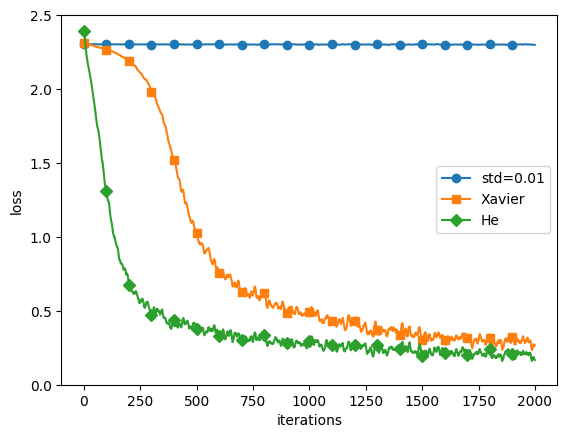

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1. 실험용 설정==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

# 배치정규화

* 앞절에서는 각 층의 활성화값 분포를 관찰해보며, 가중치의 초깃값을 적절히 설정하면 각 층의 활성화값 분포가 적당히 퍼지면서 학습이 원활하게 수행됨을 배웠다.
* 그렇다면 각 층이 활성화를 적당히 퍼뜨리도록 '강제'해보면 어떨까?
* 배치 정규화는 여기서 출발했다.

배치 정규화 알고리즘

배치 정규화가 주목받는 이유는 다음과 같다.

- 학습을 빨리 진행할 수 있다.

- 초기값에 크게 의존하지 않는다

- 오버피팅을 억제한다.

배치 정규화의 기본 아이디어는 각 층에서의 활성화값이 적당히 분포 되도록 조정하는 것이다.

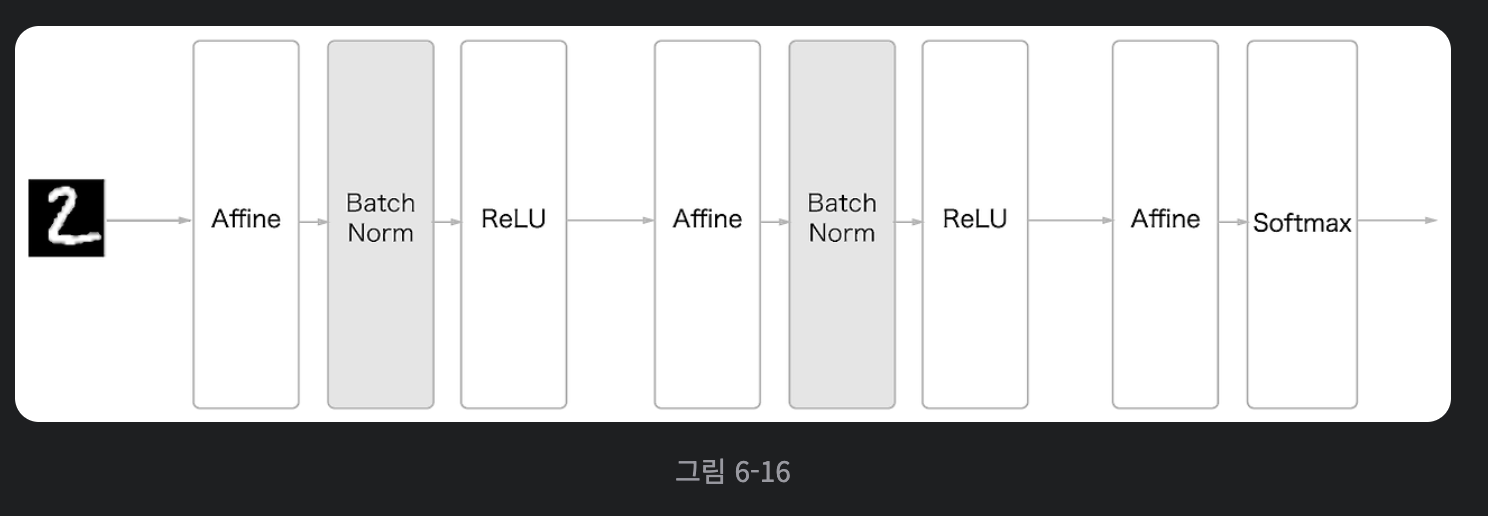

* 그림 6-16과 같이 데이터 분포를 정규화하는 배치 정규화(batch norm) 계층을 신경망에 삽입한다.

* 배치 정규화는 그 이름과 같이 학습 시 미니배치를 단위로 정규화 한다.
* 구체적으로는 데이터 분포가 평균이 0, 분산이 1이 되도록 정규화한다.

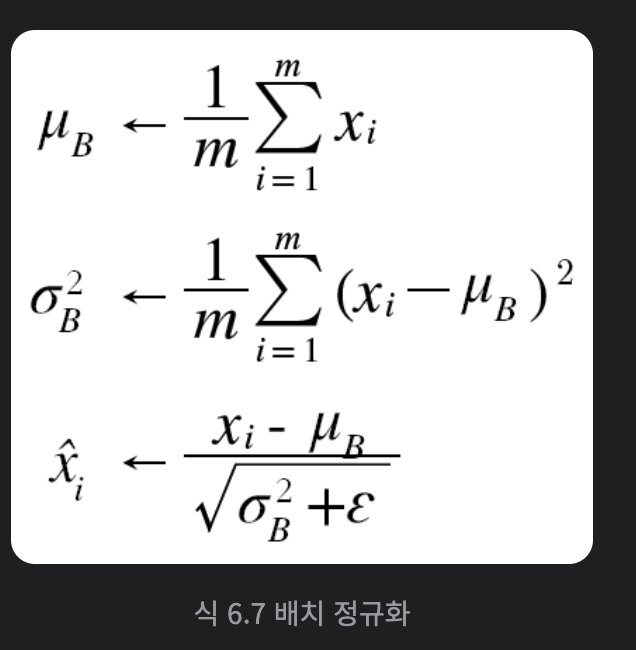

* 미니배치 B이라는 m개의 입력 데이터의 집합에 대해 평균과 분산을 구한다.
* 그리고 입력 데이터 평균이 0, 분산이 1이 되게 정규화한다.
* 그리고 엡실론기호는 작은값으로, 0 으로 나눠지는 사태를 막는다.

* 단순히 미니배치 입력데이터를 평균 0, 분산1인 데이터으로 변환하는 일을 한다.
* 이 처리를 활성화 함수의 앞에 삽입함으로써 데이터 분포가 덜 치우치게 할 수 있다.

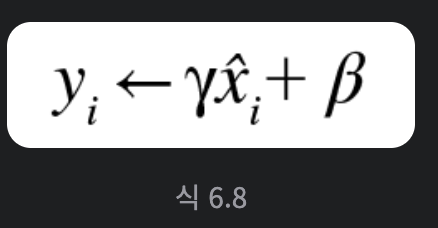

* 배치 정규화 계층마다 이 정규화된 데이터에 고유한 확대(scale)와 이동(shift)변환을 수행한다.
* 식에서 γ가 확대를 β가 이동을 담당하며 두 값은 각각 처음에 1, 0으로 시작하고 학습하면서 적합한 값으로 조정 해 간다.

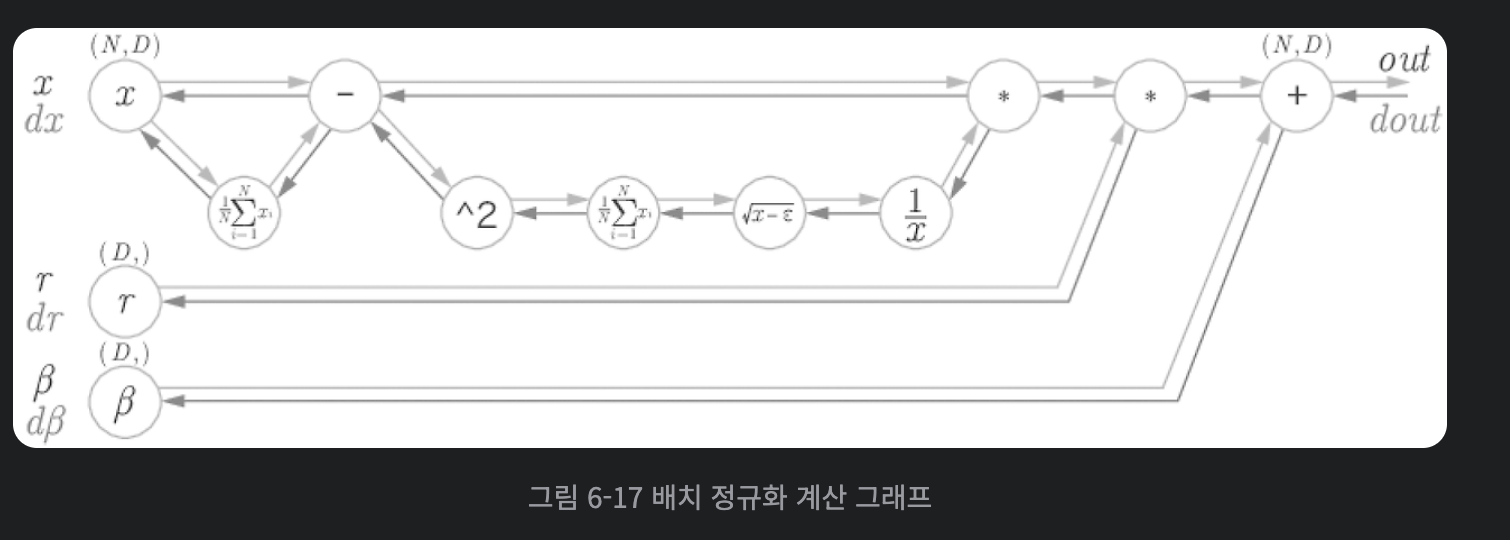

배치 정규화의 효과

epoch:0 | 0.096 - 0.092
epoch:1 | 0.101 - 0.102
epoch:2 | 0.102 - 0.227
epoch:3 | 0.108 - 0.441
epoch:4 | 0.111 - 0.544
epoch:5 | 0.121 - 0.613
epoch:6 | 0.123 - 0.651
epoch:7 | 0.126 - 0.705
epoch:8 | 0.135 - 0.725
epoch:9 | 0.158 - 0.753
epoch:10 | 0.18 - 0.782
epoch:11 | 0.189 - 0.8
epoch:12 | 0.199 - 0.816
epoch:13 | 0.22 - 0.82
epoch:14 | 0.24 - 0.835
epoch:15 | 0.273 - 0.846
epoch:16 | 0.284 - 0.864
epoch:17 | 0.316 - 0.874
epoch:18 | 0.347 - 0.882
epoch:19 | 0.355 - 0.889


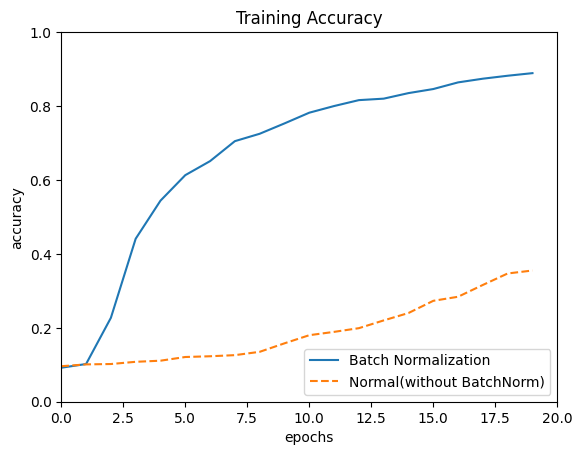

In [10]:
# coding: utf-8
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)

    train_acc_list = []
    bn_train_acc_list = []

    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0

    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)

        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)

            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))

            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break

    return train_acc_list, bn_train_acc_list


# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

train_acc_list, bn_train_acc_list = __train(weight_scale_list[4])

plt.title("Training Accuracy")
plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
plt.ylim(0, 1.0)
plt.xlim(0, max_epochs)
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend(loc='lower right')

plt.show()

* 배치 정규화가 학습을 빨리 진전시키고 있다.

============== 1/16 ==============
epoch:0 | 0.105 - 0.098


/content/deep-learning-from-scratch/common/multi_layer_net_extend.py:105: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/content/deep-learning-from-scratch/common/multi_layer_net_extend.py:105: RuntimeWarning: invalid value encountered in scalar multiply
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:1 | 0.097 - 0.083
epoch:2 | 0.097 - 0.106
epoch:3 | 0.097 - 0.131
epoch:4 | 0.097 - 0.163
epoch:5 | 0.097 - 0.18
epoch:6 | 0.097 - 0.203
epoch:7 | 0.097 - 0.223
epoch:8 | 0.097 - 0.242
epoch:9 | 0.097 - 0.269
epoch:10 | 0.097 - 0.285
epoch:11 | 0.097 - 0.3
epoch:12 | 0.097 - 0.308
epoch:13 | 0.097 - 0.324
epoch:14 | 0.097 - 0.331
epoch:15 | 0.097 - 0.347
epoch:16 | 0.097 - 0.365
epoch:17 | 0.097 - 0.37
epoch:18 | 0.097 - 0.39
epoch:19 | 0.097 - 0.391
============== 2/16 ==============
epoch:0 | 0.097 - 0.092
epoch:1 | 0.097 - 0.105
epoch:2 | 0.097 - 0.131
epoch:3 | 0.097 - 0.126
epoch:4 | 0.097 - 0.145
epoch:5 | 0.097 - 0.165
epoch:6 | 0.097 - 0.194
epoch:7 | 0.097 - 0.225
epoch:8 | 0.097 - 0.25
epoch:9 | 0.097 - 0.287
epoch:10 | 0.097 - 0.321
epoch:11 | 0.097 - 0.342
epoch:12 | 0.097 - 0.371
epoch:13 | 0.097 - 0.392
epoch:14 | 0.097 - 0.417
epoch:15 | 0.097 - 0.439
epoch:16 | 0.097 - 0.452
epoch:17 | 0.097 - 0.463
epoch:18 | 0.097 - 0.482
epoch:19 | 0.097 - 0.511
============== 

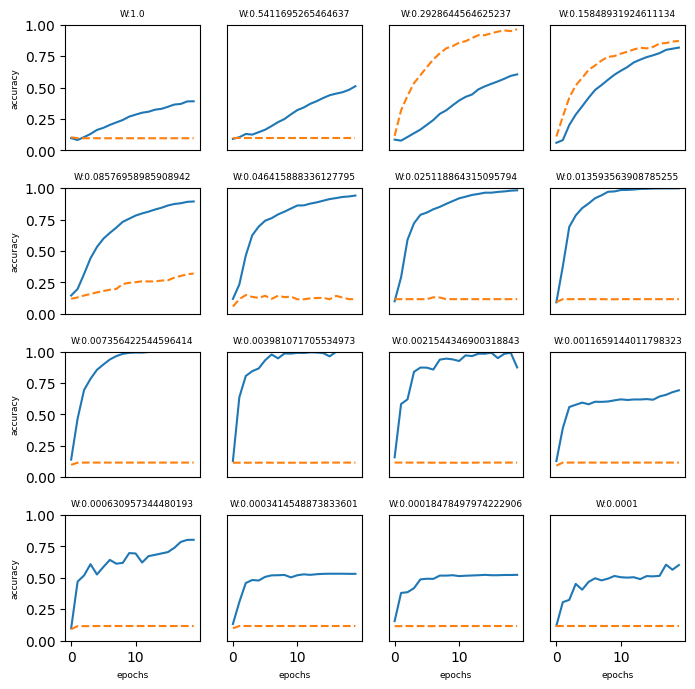

In [11]:
# coding: utf-8
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)

    train_acc_list = []
    bn_train_acc_list = []

    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0

    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)

        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)

            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))

            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break

    return train_acc_list, bn_train_acc_list


# 그래프 그리기==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

plt.figure(figsize=(8, 8))

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)

    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w), fontsize=6.5)
    plt.plot(x, bn_train_acc_list, markevery=2)
    plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy", fontsize=6.5)
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs", fontsize=6.5)

plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

* 배치정규화(BN)는 “항상” 성능을 올려주는 기법이 아니라,
조건이 맞을 때 도움이 되는 안정화 도구다. 보편적으로 사용

# 바른 학습을 위해

* 오버피팅이란 신경망이 훈련데이터에만 지나치게 적응되어 그 외의 데이터에는 제대로 대응하지 못하는 상태를 말한다.
* 기계학습은 범용 성능을 지향한다.
* 훈련 데이터에는 포함되지 않은, 아직 보지 못한 데이터가 주어져도 바르게 식별해내는 모델이 바람직하다.


오버피팅

* 오버피팅은 매개변수가 많고 표현력이 높은 모델일 경우와 훈련 데이터가 적을 때 일어난다.

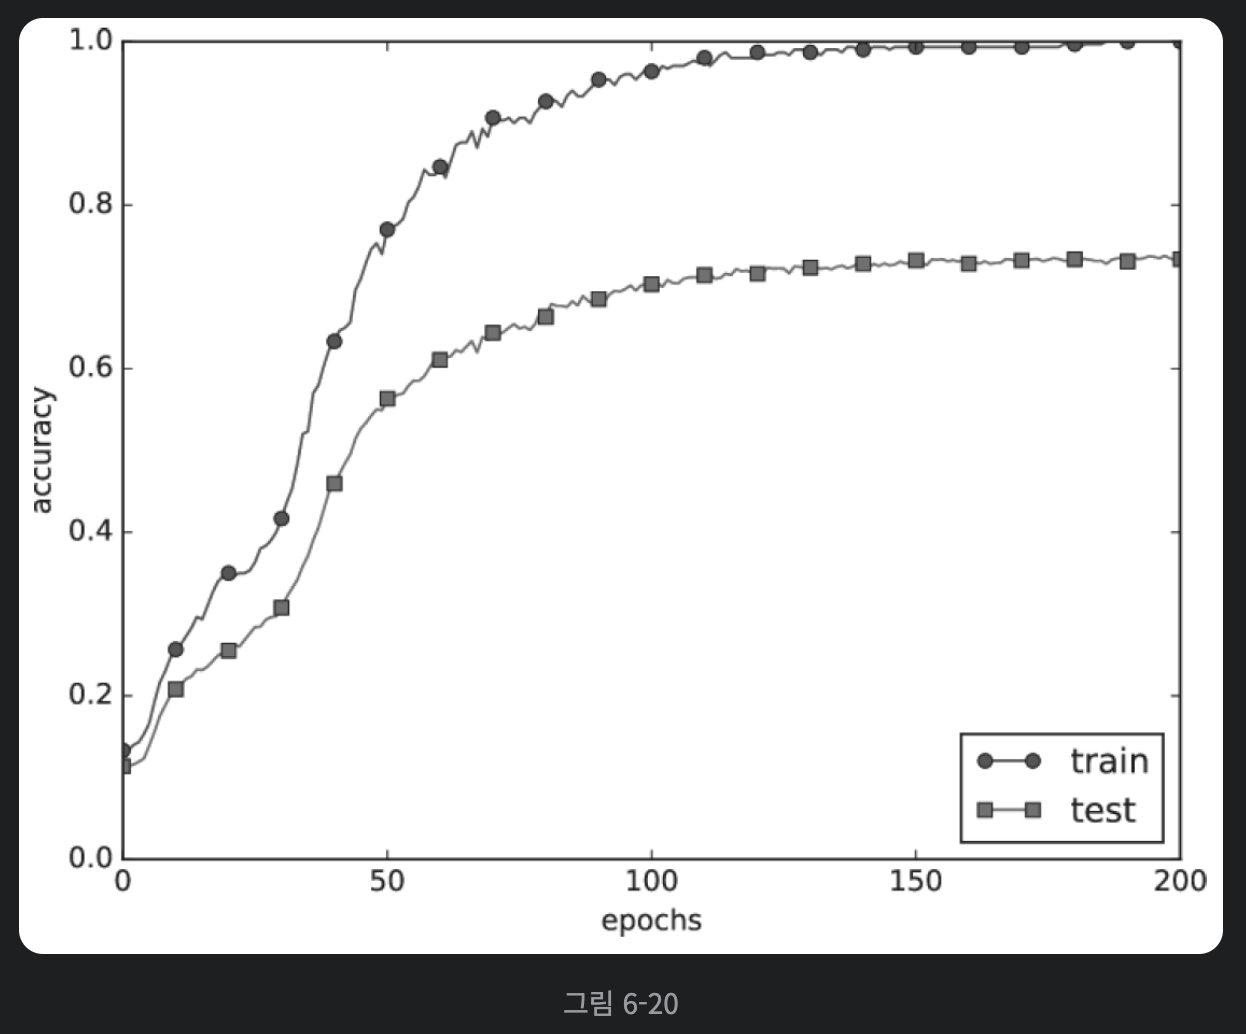

* 훈련 데이터를 사용하여 측정한 정확도는 100 에폭을 지나는 무렵부터 거의 100%임을 그림 6-20을 통해 알 수 있다. 하지만 시험 데이터에 대해서는 큰 차이를 보인다. * 이처럼 정확도가 크게 벌어지는 것은 훈련 데이터에만 적응(fitting) 해 버린 결과이다.

가중치 감소

* 오버피팅 억제용으로 가중치 감소라는 방법이 있다.

* 학습 과정에서 큰 가중치에 대해서는 그에 상응하는 큰 페널티를 부과하여 오버피팅을 억제하는 방법이다.
* 원래 오버피팅은 가중치 매개변수의 값이 커서 발생하는 경우가 많기 때문이다.

* 복습하면 신경망 학습의 목적은 손실 함수의 값을 줄이는 것이다.
* 예를들어 가중치 제곱노름을 손실함수에 더한다 그러면 가중치가 커지는 것을 억제할 수 있다.
* 람다는 정규화 세기를 조절하는 하리퍼파라미터이다.
* 람다가 크면 큰 w에 대해 더 큰 페널티를 준다.
* 가중치 감소는 모든 가중치 각각의 손실에 1/2 * 람다 * w**2를 더하게 되고
* 가중치 기울기를 구하는 계산에서는 오차역전파법에 따른 결과에 정규화 항을 미분해 람다 * W를 더한다.

In [12]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 과대적합을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

epoch:0, train acc:0.10666666666666667, test acc:0.1089
epoch:1, train acc:0.13, test acc:0.118
epoch:2, train acc:0.16, test acc:0.1283
epoch:3, train acc:0.17666666666666667, test acc:0.1392
epoch:4, train acc:0.18333333333333332, test acc:0.1556
epoch:5, train acc:0.19, test acc:0.1618
epoch:6, train acc:0.21333333333333335, test acc:0.1709
epoch:7, train acc:0.23666666666666666, test acc:0.182
epoch:8, train acc:0.26666666666666666, test acc:0.193
epoch:9, train acc:0.2866666666666667, test acc:0.2043
epoch:10, train acc:0.2966666666666667, test acc:0.2158
epoch:11, train acc:0.3333333333333333, test acc:0.2318
epoch:12, train acc:0.36333333333333334, test acc:0.2491
epoch:13, train acc:0.37666666666666665, test acc:0.2622
epoch:14, train acc:0.42, test acc:0.2886
epoch:15, train acc:0.4766666666666667, test acc:0.3101
epoch:16, train acc:0.49, test acc:0.3303
epoch:17, train acc:0.5266666666666666, test acc:0.3472
epoch:18, train acc:0.5433333333333333, test acc:0.357
epoch:19, tr

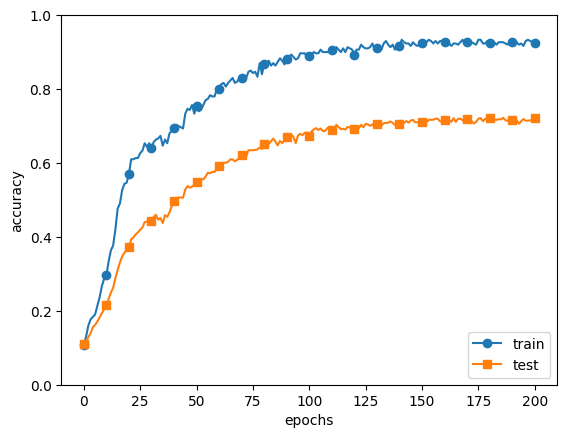

In [13]:
weight_decay_lambda = 0.1 # 가중치 감쇠 설정
network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

* 가중치 감소를 이용하지 않은 그림 비교하면 그 차이가 줄었음을 그림을 통해 알 수 있다.
* 앞선 그림과 달리 정확도 100에 도달하지 못한 점도 주목해야한다.

드롭아웃

* 신경망 모델이 복잡해지면 가중치 감소만으로는 대응하기 어려워진다.
* 이럴때는 흔히 드롭아웃기법을 사용한다.

* 드롭아웃은 뉴런을 임의로 삭제하면서 학습하는 방법이다.
* 훈련 때 은닉층의 뉴런을 무작위로 골라 삭제한다.

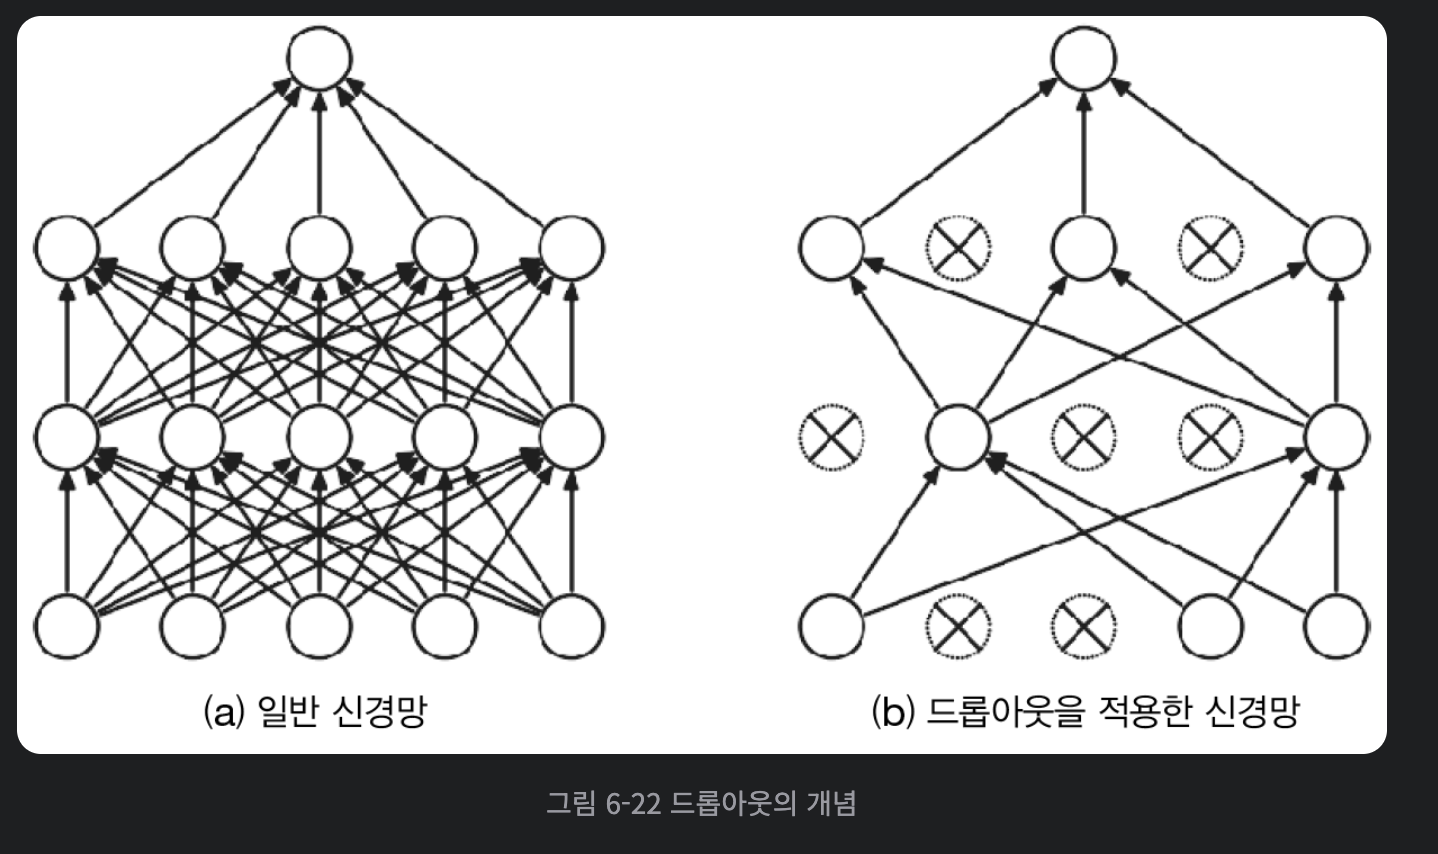

* 훈련 때는 데이터를 흘릴 때마다 삭제할 뉴런을 무작위로 선택하고 시험 때는 모든 뉴런에 신호를 전달한다.
* 단, 시험 때는 각 뉴런의 출력에 훈련 때 삭제한 비율을 곱해 출력한다.
* 순전파를 담당하는 forward 메서드에서는 훈련때만 잘 계산해두면
* 시험떄는 단순히 데이터를 흘리기만 하면되고 삭제 안한 비율을 곱하지않아도 좋다.
* 실제 딥러닝 프레임워크들도 비율을 곱하지 않는다.
  * 체이너프레임워크의 드롭아웃 구현 참고

In [14]:
class Dropout:
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None

    def forward(self, x, train_flg=True):
        if train_flg:
            self.mask = np.random.rand(*x.shape) > self.dropout_ratio
            return x * self.mask
        else:
            return x * (1.0 - self.dropout_ratio)

    def backward(self, dout):
        return dout * self.mask

* 여기에서 핵심은 훈련 시에는 순전파 때마다 self.mask에 삭제할 뉴런을 false로 표시한다는 것이다.
* self.masksms x와 형상이 같은 배열을 무작위로 생성하고, 그 값이 dropout_ratio보다 큰 원소만 True로 설정한다. 역전파 때의 동작은 ReLU와 같다.
* 즉 순전파 때 신호를 통과시키는 뉴런은 역전파 때도 신호를 그대로 통과시키고, 순전파때 통과하지않은 뉴런은 역전파 때도 신호를  차단한다.

Mnist 데이터셋으로 효과 학인

train loss:2.2917709226813794
=== epoch:1, train acc:0.07666666666666666, test acc:0.1077 ===
train loss:2.307418785086666
train loss:2.2990325090433297
train loss:2.307880838045156
=== epoch:2, train acc:0.08333333333333333, test acc:0.1111 ===
train loss:2.308964816971405
train loss:2.2929900626529918
train loss:2.3072438407777387
=== epoch:3, train acc:0.08666666666666667, test acc:0.114 ===
train loss:2.3062894667569807
train loss:2.2881347099066915
train loss:2.2965340140323933
=== epoch:4, train acc:0.08333333333333333, test acc:0.1183 ===
train loss:2.3033938922501047
train loss:2.2907019781454734
train loss:2.3003350248372554
=== epoch:5, train acc:0.09666666666666666, test acc:0.1231 ===
train loss:2.2718795803092573
train loss:2.3033172578743755
train loss:2.2922590374676117
=== epoch:6, train acc:0.1, test acc:0.1294 ===
train loss:2.289394621077172
train loss:2.304852490184389
train loss:2.268822805392529
=== epoch:7, train acc:0.10666666666666667, test acc:0.1342 ===
train

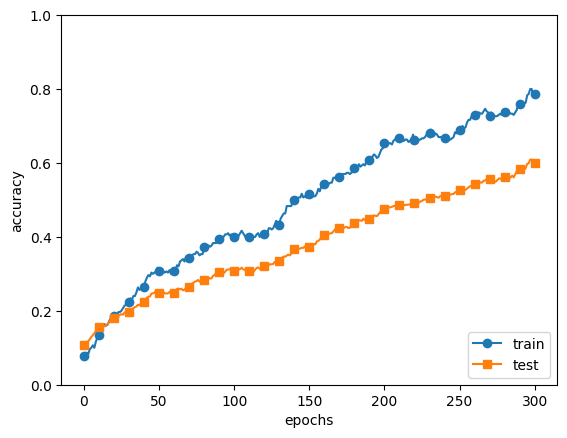

In [15]:
# coding: utf-8
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비율 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

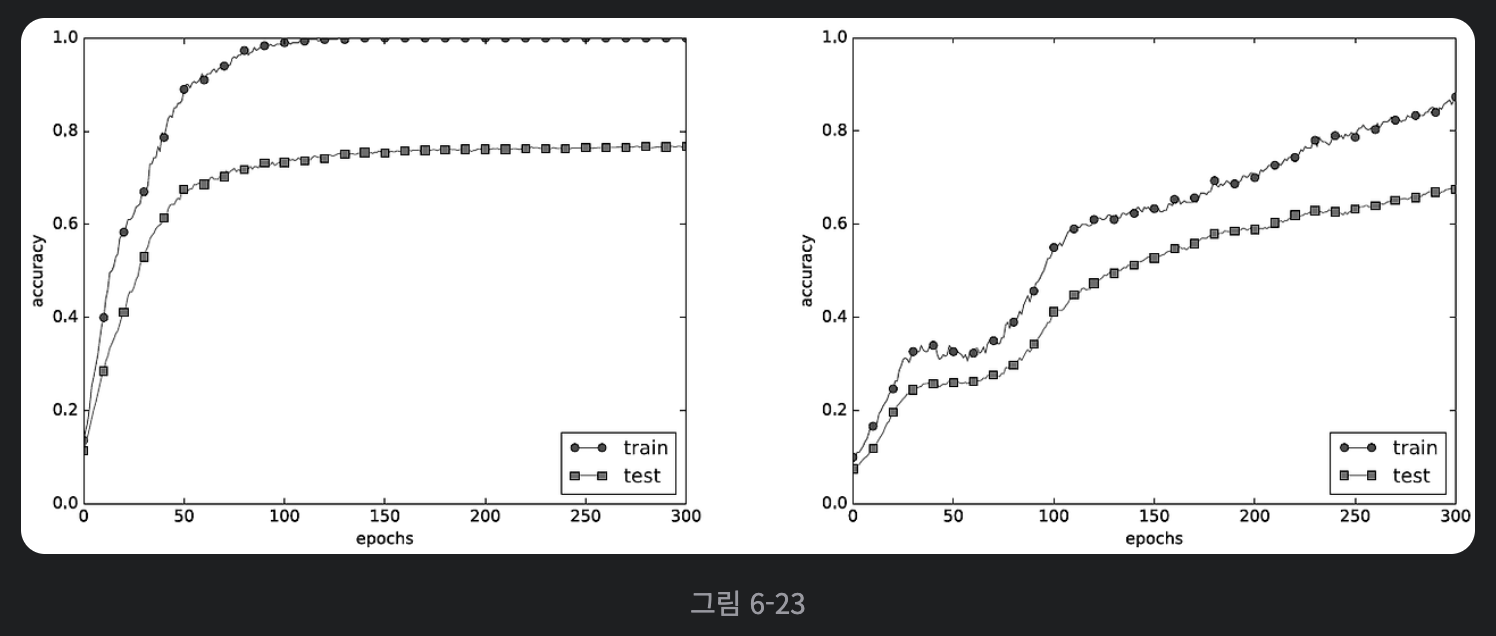

* 드롭아웃을 적용하니 훈련 데이터와 시험 데이터에 대한 정확도 차이가 줄었다. 또, 훈련 데이터에 대한 정확도가 100%에 도달하지도 않게 되었다.

* 이처럼 드롭아웃을 이용하면 표현력을 높이면서도 오버피팅을 억제할 수 있다.

앙상블 학습
* 개별적으로 학습시킨 여러 모델의 출력을 평균 내어 추론하는 방식이다.
* 앙상블 학습은 드롭아웃과 밀접하다.
  * 드롭아웃이 학습 때 뉴런을 무작위로 삭제하는 행위를 매번 다른 모델을 학습시키는 것으로 해석할 수 있기 때문이다.
  * 그리고 추론 때는 뉴런의 출력에 삭제한 비율을 곱하므로써 여러 모델의 평균을 내는 앙상블과 같은 효과를 얻는 것이다.
  * 즉 드롭아웃은 앙상블 학습과 같은 효과를 하나의 네트워크로 구현했다고 생각할 수 있다.

# 적절한 하이퍼파라미터 값 찾기

* 신경망에는 하이퍼파라미터가 다수 등장한다.
* 하이퍼파라미터에는 뉴런 수, 배치 크기, 매개변수 갱신 시의 학습률과 가중치 감소등이 있다.
* 지금까지는 데이터셋을 훈련데이터와 시험데이터라는 두 가지로 분리해 이용했다.
* 훈련데이터로는 학습을 하고, 시험 데이터로는 범용 성능을 평가했다.

검증 데이터

* 하이퍼파라미터의 성능을 평가할 때는 시험 데이터를 사용해서는 안된다.
* 시험 데이터를 사용하여 하이퍼파라미터를 조정하게 되면 하이퍼파라미터 값이 시험 데이터에 오버피팅되기 때문이다.
* 그래서 하이퍼파라미터를 조정할 때는 하이퍼파라미터 전용 확인 데이터가 필요하다. 하이퍼파라미터 조정용 데이터를 일반적으로 검증 데이터라고 부른다.

  - 훈련 데이터 : 매개변수 학습
  - 검증 데이터 : 하이퍼파리미터 성능 평가
  - 시험 데이터 : 신경망의 범용 성능 평가

* Mnist 데이터셋에서 검증 데이터를 얻는 가장 간단한 방법은 훈련 데이터 중 20% 정도를 검증 데이터로 먼저 분리하는 것이다.

In [16]:
def shuffle_dataset(x, t):
    """데이터셋을 뒤섞는다.

    Parameters
    ----------
    x : 훈련 데이터
    t : 정답 레이블

    Returns
    -------
    x, t : 뒤섞은 훈련 데이터와 정답 레이블
    """
    permutation = np.random.permutation(x.shape[0])
    x = x[permutation,:] if x.ndim == 2 else x[permutation,:,:,:]
    t = t[permutation]

    return x, t

In [17]:
(x_train, t_train), (x_test, t_test) = load_mnist()

# 훈련 데이터를 뒤섞는다.
x_train, t_train = shuffle_dataset(x_train, t_train)

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

하이퍼파라미터 최적화

* 하이퍼파라미터를 최적화 할 때의 핵심은 하이퍼파라미터의 최적 값이 존재하는 범위를 조금씩 줄여간다는 것이다.

* 대략적인 범위를 설정하고 그 범위에서 무작위로 하이퍼파라미터 값을 골라(샘플링)낸 후 그 값으로 정확도를 평가한다.

* 하이퍼파라미터의 범위는 대략적으로 지정하는 것이 효과적이다. 보통은 10의 거듭제곱 단위로 범위를 지정한다.

* 하이퍼파라미터를 최적화 할 때는 딥러닝 학습에는 오랜시간이 걸린다는 점에 주의해야 한다.

- 0단계

  : 하이퍼파라미터 값의 범위를 설정한다.

- 1단계

  : 설정된 범위에서 하이퍼파라미터의 값을 무작위로 추출한다.

- 2단계

  : 1단계에서 샘플링한 하이퍼파라미터 값을 사용하여 학습하고 검증 데이터로 정확도를 평가한다.

- 3단계

  : 1단계와 2단계를 특정 횟수를 반복하며 그 정확도의 결과를 보고 하이퍼파라미터의 범위를 좁힌다.

위 단계들을 반복하여 하이퍼파라미터의 범위를 좁히고 어느 정도 좁아지면 그 압축한 범위에서 값을 하나 골라낸다.

* 여기서 설명한 하이퍼파라미터 최적화 방법은 실용적인 방법이다.
* 하지만 과학이라기보다는 다분히 수행자의 '지혜'와'직관'에 의존한다고 느낌이 든다.
* 더 세련된 기법을 원한다면 베이즈 최적화가 있다.

하이퍼파라미터 최적화 구현하기

In [ ]:
# 참고

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

plt.figure(figsize=(10, 8))

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()

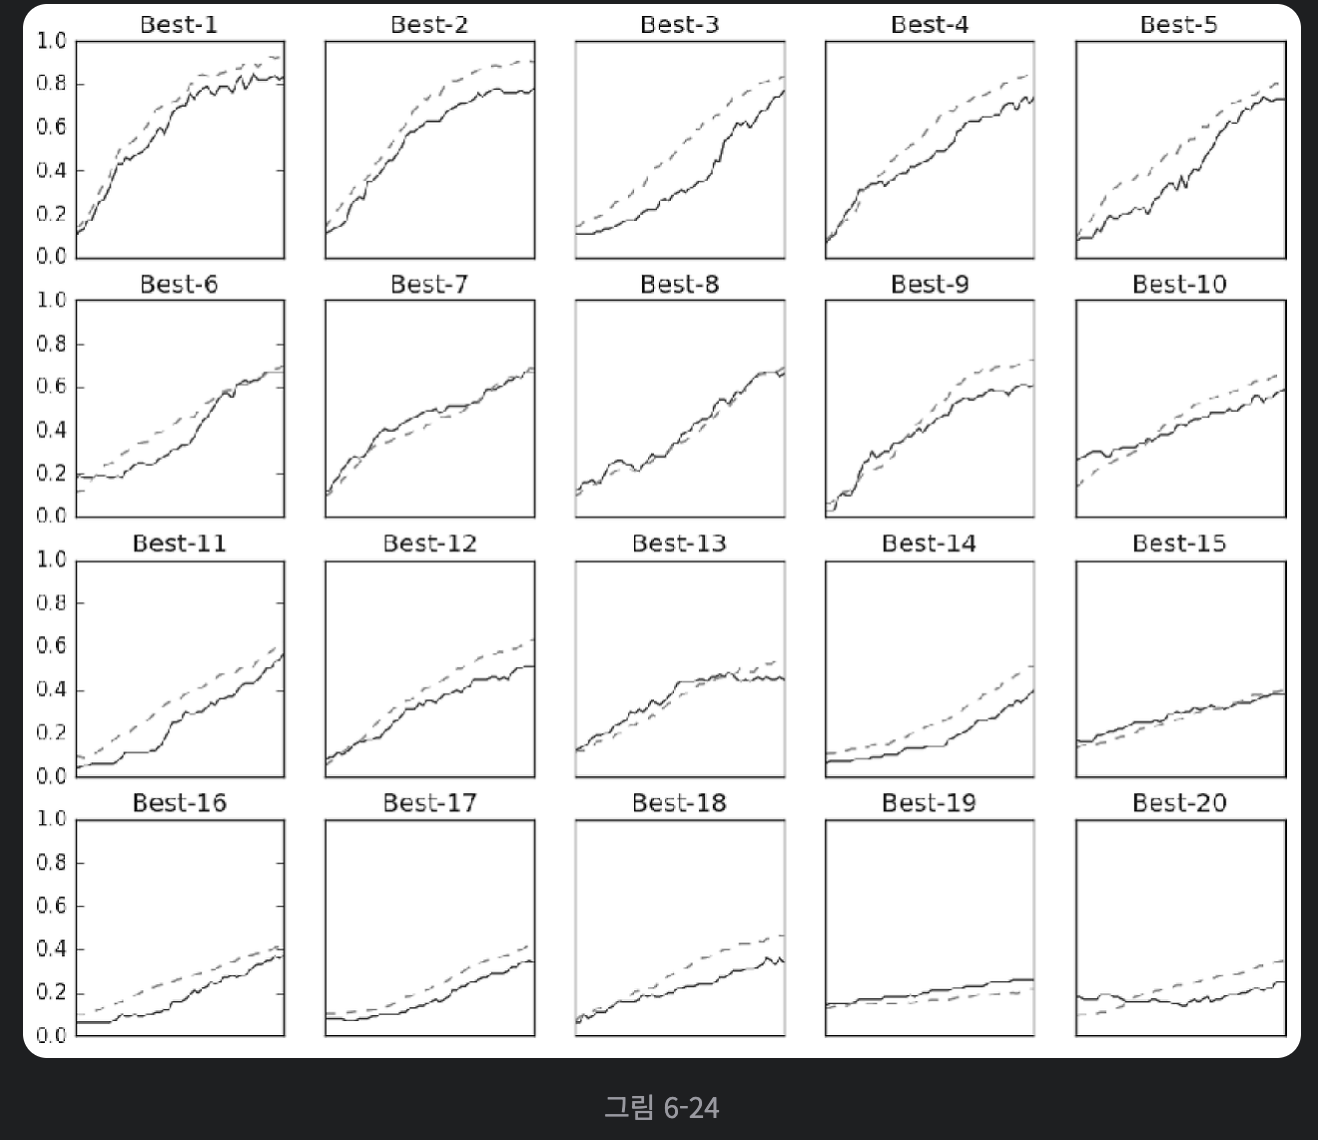

* 가중치 감소 계수의 범위를 10^-8~10^-4, 학습률의 범위를 10^-6~10^-2로 하여 실험하면 결과는 그림 6-24처럼 된다.

* 이 결과를 보면 학습이 잘 진행될 때의 학습률은 0.001~0.01, 가중치 감소 계수는 10^-8~10^-6 정도라는 것을 알 수 있다.

* 이처럼 잘될 것 같은 값의 범위를 관찰하고 범위를 좁혀간다. 그런 다음 그 축소된 범위로 똑같은 작업을 반복하는 것이다.
* 이렇게 적절한 값이 위치한 범위를 좁혀가다가 특정 단계에서 최종 하이퍼파라미터 값을 하나 선택한다.

정리

- 매개변수 갱신 방법에는 확률적 경사 하강법 (SGD) 외에도 모멘텀, AdaGrad, Adam 등이 있다.

- 가중치 초깃값을 정하는 방법은 올바른 학습을 하는 데 매우 중요하다

- 배치 정규화를 이용하면 학습을 빠르게 진행할 수 있으며 초깃값에 영향을 덜 받게 된다.

- 오버피팅을 억제하는 정규화 기술로는 가중치 감소와 드롭아웃이 있다.

- 하이퍼파라미터 값 탐색은 최적 값이 존재할 법한 범위를 점차 좁히면서 하는 것이 효과적이다.